#  ***Feature Engineering & Risk Signal Development***


In [2]:
#IMPORTING LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#LOADING THE DATA 

trans_df=pd.read_csv('../data/transactions_cleaned.csv')


In [4]:
#CREATING A NEW COLUMN TO IDENTIFY HIGH AMOUNT TRANSACTIONS

trans_df['high_amount_risk']=trans_df['amt'].apply(lambda x: 1 if x>200 else 0)

print(trans_df['high_amount_risk'].value_counts())

high_amount_risk
0    530370
1     25349
Name: count, dtype: int64


In [5]:
#CREATING A NEW COLUMN TO IDENTIFY NIGHT TIME TRANSACTIONS

trans_df['night_risk']=trans_df['trans_hour'].apply(lambda x: 1 if x>=0 and x<=6 else 0)

In [6]:
#CREATING A NEW COLUMN TO COUNT THE NUMBER OF TRANSACTIONS PER CARD

trans_df['txn_per_card'] = trans_df.groupby('cc_num')['cc_num'].transform('count')


In [7]:
#CREATING A NEW COLUMN TO IDENTIFY CARDS WITH HIGH FREQUENCY OF TRANSACTIONS

trans_df['freq_risk'] = trans_df['txn_per_card'].apply(lambda x: 1 if x>50 else 0)


In [8]:
#CREATING A NEW COLUMN TO IDENTIFY CARDS WITH HIGH LOCATION RISK

state_count = trans_df.groupby('cc_num')['state'].transform('nunique')
trans_df['location_risk'] = state_count.apply(lambda x: 1 if x>3 else 0)


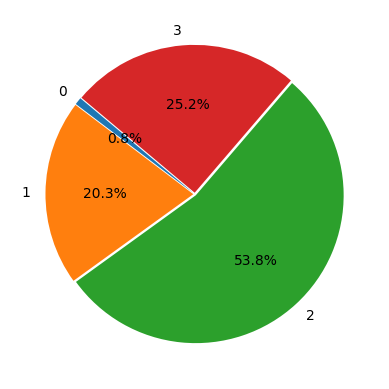

In [10]:
#CREATING A RISK SCORE BY SUMMING THE RISK FACTORS AND ANALYZING THE DISTRIBUTION OF RISK SCORES AMONG FRAUDULENT TRANSACTIONS

trans_df['risk_score'] = (
    trans_df['high_amount_risk'] +
    trans_df['night_risk'] +
    trans_df['freq_risk'] +
    trans_df['location_risk']
)

risk_score_count = trans_df[trans_df['is_fraud']==1].groupby('risk_score').size()

risk_score_labels=risk_score_count.index.astype(str)

explodes =[0.01,0.01,0.01,0.01]

plt.pie(risk_score_count, labels=risk_score_labels, explode=explodes, autopct='%1.1f%%', startangle=140)

plt.show()

risk_score_fraud=trans_df[trans_df['is_fraud']==1][risk_score].avg()

In [ ]:
#CALCULATING THE AVERAGE RISK SCORE FOR FRAUDULENT AND NON-FRAUDULENT TRANSACTIONS

risk_score_fraud=trans_df[trans_df['is_fraud']==1]['risk_score'].mean()
risk_score_nonfraud=trans_df[trans_df['is_fraud']==0]['risk_score'].mean()

print(risk_score_fraud)
print(risk_score_nonfraud)

2.033100233100233
1.2710044185601201


In [ ]:
#ANALYZING THE PROPORTION OF FRAUDULENT TRANSACTIONS FOR EACH RISK SCORE

total_fraud=trans_df[trans_df['is_fraud']==1].groupby('risk_score').size().sum()
fraud_percentage=trans_df[trans_df['is_fraud']==1].groupby('risk_score').size()/total_fraud*100

In [ ]:
fraud_category=trans_df[trans_df['is_fraud']==1].groupby('category').size()

print(fraud_category)

category
entertainment      59
food_dining        54
gas_transport     154
grocery_net        41
grocery_pos       485
health_fitness     52
home               67
kids_pets          65
misc_net          267
misc_pos           72
personal_care      70
shopping_net      506
shopping_pos      213
travel             40
dtype: int64


### ***Why each feature created?***

 ***High Amount*** - To identify large transactions which may indicate fraudulent activity.Fraudsters often ateempt high-value transactions once they gain access to an account or card

***Risk Score***-To combine multiple suspicious trancastion behaiviours into a single measurable value thathelp identify high-risk transactions and support fraud decisions

In [11]:
fraud_count = trans_df.groupby("risk_score")["is_fraud"].sum()
total_count = trans_df.groupby("risk_score")["is_fraud"].count()

print("Fraud count score:")
print(fraud_count)

print("\nTotal transactions per score:")
print(total_count)

Fraud count per score:
risk_score
0      17
1     435
2    1153
3     540
Name: is_fraud, dtype: int64

Total transactions per score:
risk_score
0        17
1    410010
2    139130
3      6562
Name: is_fraud, dtype: int64
